# <center><span style="color:blue">Segmenting and Clustering Neighborhoods in Novi</span></center>

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from bs4 import BeautifulSoup

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns
sns.set()

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

## <span style="color:blue">Population:</span>

#### To get html population data: https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&forecast=5&format=google&variable=demographics.population.count&entity_id=1600000US2659440

In [2]:
population_html = requests.get('https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&forecast=5&format=google&variable=demographics.population.count&entity_id=1600000US2659440').text
soup_population = BeautifulSoup(population_html,'lxml')

str_pop = soup_population.p.text
#str_pop

**Create a function to convert json into list**

In [3]:
def json2list(str_data):
    dict_data = json.loads(str_data)
    data_rows = dict_data['data']['rows']
    
    v0 = []
    v1 = []
    
    for i in range(len(data_rows)):
        data_row = data_rows[i]['c']
        v0.append(data_row[0]['v'])
        v1.append(data_row[1]['v'])
    
    return v0, v1

**Create "Year" and "Population" list**

In [4]:
year, population = json2list(str_pop)

year = year[0:10]
population = population[0:10]

df_pop = pd.DataFrame(year,columns=['Year'])
df_pop['Population'] = population

df_pop

,Year,Population
0,2009,53705.00
1,2010,53823.00
2,2011,54446.00
3,2012,55319.00
4,2013,56131.00
5,2014,56887.00
6,2015,57577.00
7,2016,58233.00
8,2017,58835.00
9,2018,59476.25


Text(0.5, 1.0, 'Population in Novi, MI 2009-2018')

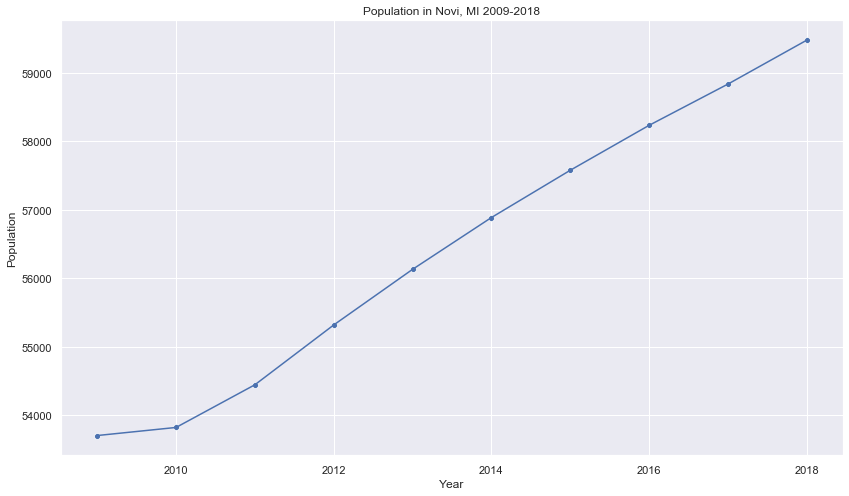

In [5]:
fig1, ax1 = plt.subplots(figsize=(14,8))
sns.scatterplot(x='Year',y='Population',data=df_pop)
sns.lineplot(x='Year',y='Population',data=df_pop)
ax1.set_xlabel('Year')
ax1.set_title('Population in Novi, MI 2009-2018')

## <span style="color:blue">Population Change:</span>

In [6]:
pop_chg = []
for i in range(len(df_pop['Population'])-1):
    pop_chg.append((df_pop['Population'][i+1]-df_pop['Population'][i])/
                   df_pop['Population'][i]*100)
year = df_pop.loc[1:,'Year']

Text(0.5, 1.0, 'Population Change in Novi, MI 2009-2018')

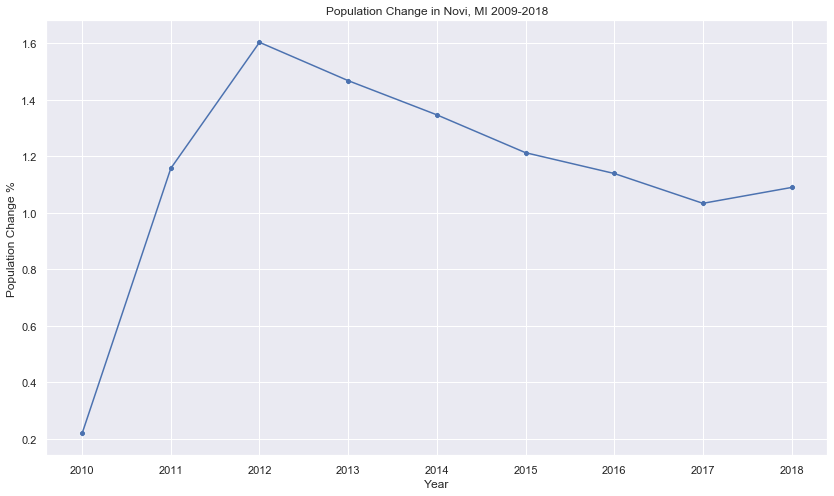

In [7]:
fig2, ax2 = plt.subplots(figsize=(14,8))
sns.scatterplot(x=year,y=pop_chg)
sns.lineplot(x=year,y=pop_chg)
ax2.set_xlabel('Year')
ax2.set_ylabel('Population Change %')
ax2.set_title('Population Change in Novi, MI 2009-2018')

## <span style="color:blue">Crime Incident</span>

#### To get html crime data: https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&format=google&variable=crime.fbi_ucr.count&entity_id=1600000US2659440&year=2016

In [8]:
crime_html = requests.get('https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&format=google&variable=crime.fbi_ucr.count&entity_id=1600000US2659440&year=2016').text
soup_crime = BeautifulSoup(crime_html,'lxml')

str_crime = soup_crime.p.text
#str_crime

**Use json2list to convert str into list**

In [9]:
crime_name, count = json2list(str_crime)
del crime_name[1]
del count[1]
#crime_name

df_crime = pd.DataFrame(crime_name,columns=['Crime'])
df_crime['Count'] = count

df_crime

,Crime,Count
0,Aggravated assault,24
1,Arson,0
2,Burglary,56
3,Larceny,586
4,Motor vehicle theft,19
5,Murder and nonnegligent manslaughter,0
6,Property crime,661
7,Rape (revised definition),6
8,Robbery,2
9,Violent crime,32


Text(0.5, 1.0, 'Crime Incident Count in Novi, MI 2017')

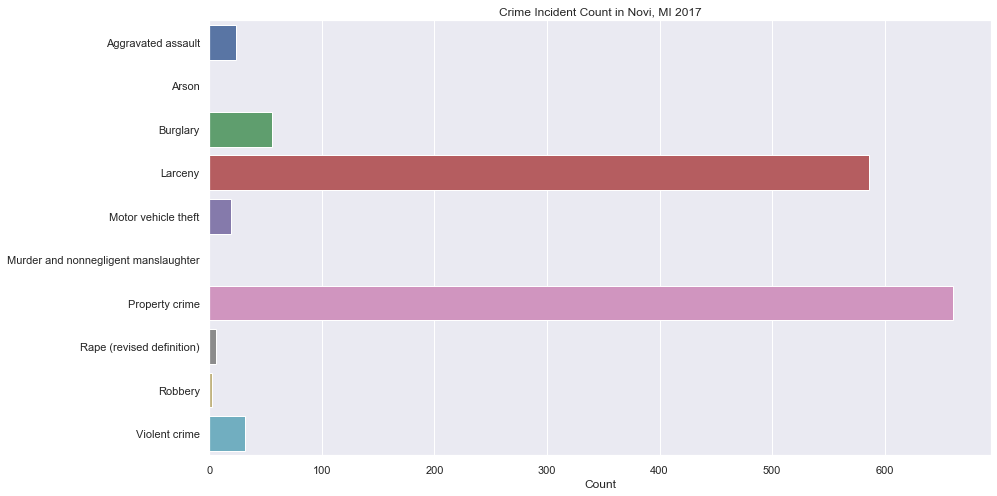

In [10]:
fig3, ax3 = plt.subplots(figsize=(14,8))
sns.barplot(x='Count',y='Crime',data=df_crime)

ax3.set_xlabel('Count')
ax3.set_ylabel('')
ax3.set_title('Crime Incident Count in Novi, MI 2017')

## <span style="color:blue">Crime Incident Rate per 100,000 People</span>

In [11]:
df_crime['Count Rate'] = df_crime['Count']/df_pop.loc[8,'Population']*100000


Text(0.5, 1.0, 'Crime Incident Rate per 100,000 People in Novi, MI 2017')

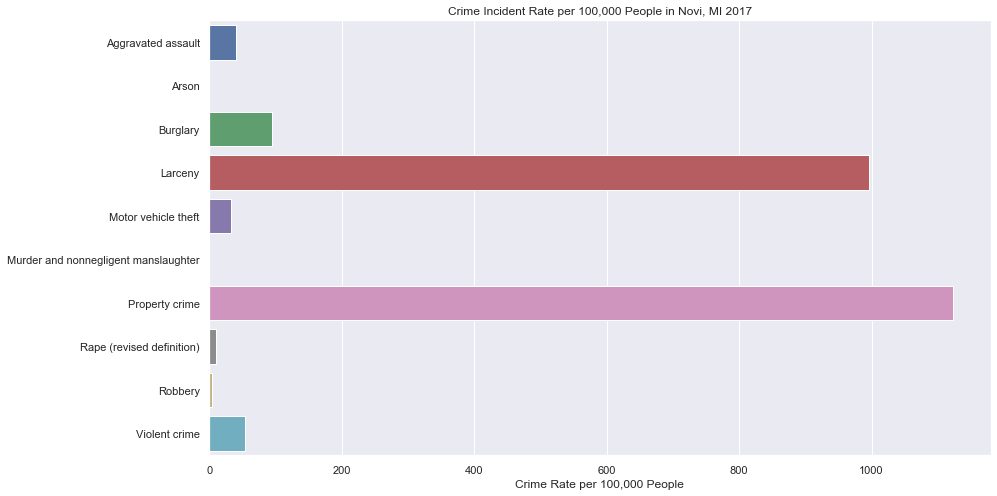

In [12]:
fig4, ax4 = plt.subplots(figsize=(14,8))
sns.barplot(x='Count Rate',y='Crime',data=df_crime)

ax4.set_xlabel('Crime Rate per 100,000 People')
ax4.set_ylabel('')
ax4.set_title('Crime Incident Rate per 100,000 People in Novi, MI 2017')

## <span style="color:blue">Earnings and Gender</span>

#### To get html earning data: https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&format=google&variable=jobs.earnings.median_earnings%2Cjobs.earnings.female_median_earnings%2Cjobs.earnings.male_median_earnings&entity_id=1600000US2659440&year=2016

In [13]:
earning_html = requests.get('https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&format=google&variable=jobs.earnings.median_earnings%2Cjobs.earnings.female_median_earnings%2Cjobs.earnings.male_median_earnings&entity_id=1600000US2659440&year=2016').text
soup_earning = BeautifulSoup(earning_html,'lxml')

str_earning = soup_earning.p.text
#str_earning

In [14]:
gender_name, earning = json2list(str_earning)
gender_name = [w.replace('_',' ') for w in gender_name] # get rid of '_' in the name

df_gender = pd.DataFrame(earning,index=gender_name,columns=['Earning'])
df_gender

,Earning
female median earnings,36142
male median earnings,72766
median earnings,52249


## <span style="color:blue">Earnings and Education</span>

#### To get html education data: https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&format=google&variable=jobs.earnings.median_earnings_less_than_high_school%2Cjobs.earnings.median_earnings_high_school%2Cjobs.earnings.median_earnings_some_college_or_associates%2Cjobs.earnings.median_earnings_bachelor_degree%2Cjobs.earnings.median_earnings_graduate_or_professional_degree&entity_id=1600000US2659440&year=2016

In [15]:
earning_html = requests.get('https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&format=google&variable=jobs.earnings.median_earnings_less_than_high_school%2Cjobs.earnings.median_earnings_high_school%2Cjobs.earnings.median_earnings_some_college_or_associates%2Cjobs.earnings.median_earnings_bachelor_degree%2Cjobs.earnings.median_earnings_graduate_or_professional_degree&entity_id=1600000US2659440&year=2016').text
soup_earning = BeautifulSoup(earning_html,'lxml')

str_earning = soup_earning.p.text

In [16]:
edu, earning = json2list(str_earning)
edu = [w.replace('_',' ') for w in edu] # get rid of '_' in the name
edu

df_edu = pd.DataFrame(edu,columns=['Education'])
df_edu['Earnings'] = earning
df_edu

,Education,Earnings
0,median earnings bachelor degree,69651
1,median earnings graduate or professional degree,89234
2,median earnings high school,30475
3,median earnings less than high school,14514
4,median earnings some college or associates,39578


Text(0.5, 1.0, 'Earnings and Education in Novi, MI 2017')

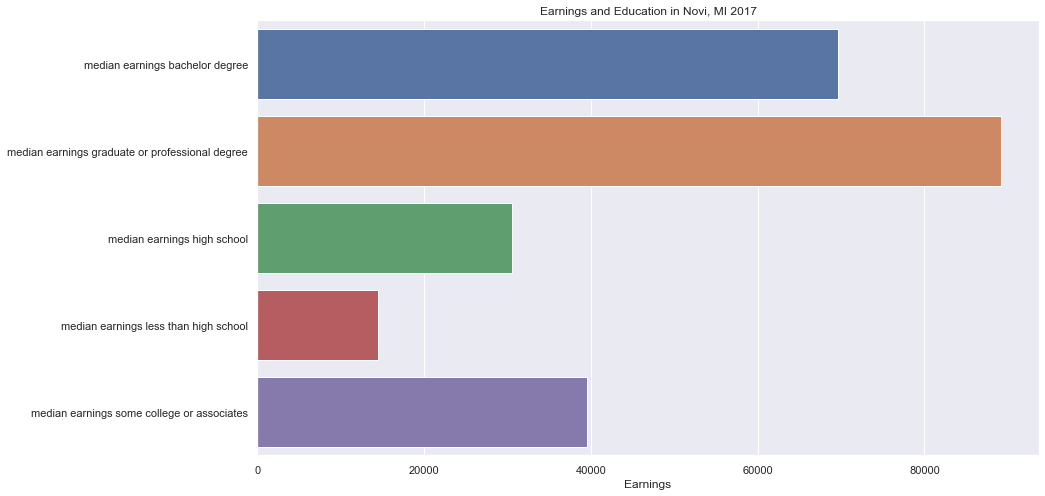

In [17]:
fig5, ax5 = plt.subplots(figsize=(14,8))
sns.barplot(x='Earnings',y='Education',data=df_edu)

ax5.set_xlabel('Earnings')
ax5.set_ylabel('')
ax5.set_title('Earnings and Education in Novi, MI 2017')

## <span style="color:blue">Finance Economy</span>

* Debt refers to the total amount of outstanding dollars owed by a government entity.

* Debt Per Capita is the amount of outstanding debt per resident.

* Long Term Debt is the unmatured principal of bonds, warrants, notes, or other forms of noncurrent or long-term obligation indebtedness.

* Debt Service Ratio is the percentage of annual revenues committed to paying back debts.

* Debt as a Percentage of Taxable Value is the amount of long term debt compared to taxable value.

* Long Term Debt Revenue is the ratio of outstanding long term debts to revenues.

### Debt Per Capita

#### To get html debt per capita data: https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&format=google&variable=finance.michigan_debt.debt_health&entity_id=1600000US2659440

In [18]:
debt_capita_html = requests.get('https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&format=google&variable=finance.michigan_debt.debt_health&entity_id=1600000US2659440').text
soup_debt_capita = BeautifulSoup(debt_capita_html,'lxml')

str_debt_capita = soup_debt_capita.p.text

In [19]:
year, amount = json2list(str_debt_capita)

df_debt_capita = pd.DataFrame(year,columns=['Year'])
df_debt_capita['Debt Per Capita'] = amount
df_debt_capita

,Year,Debt Per Capita
0,2010,1170.02
1,2011,1006.16
2,2012,843.80
3,2013,713.93
4,2014,645.28
5,2015,559.74
6,2016,459.96
7,2017,391.86


Text(0.5, 1.0, 'Debt Per Capita in Novi, MI 2010-2017')

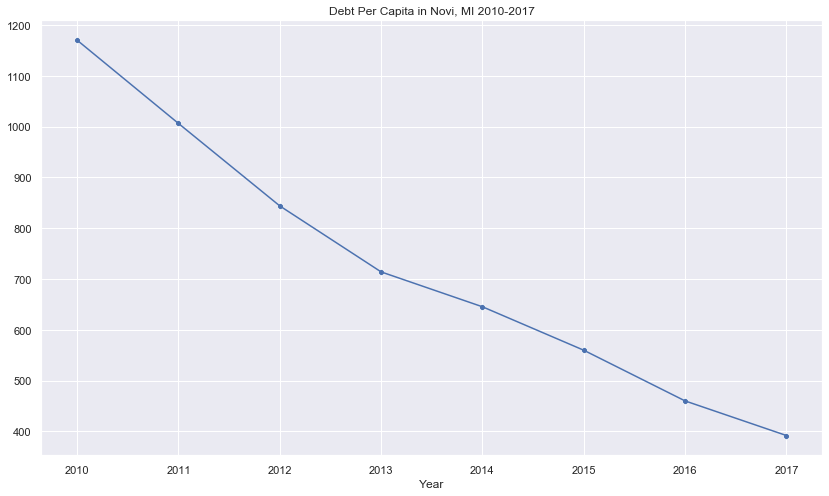

In [20]:
fig6, ax6 = plt.subplots(figsize=(14,8))
sns.scatterplot(x='Year',y='Debt Per Capita',data=df_debt_capita)
sns.lineplot(x='Year',y='Debt Per Capita',data=df_debt_capita)

ax6.set_xlabel('Year')
ax6.set_ylabel('')
ax6.set_title('Debt Per Capita in Novi, MI 2010-2017')

### Long Term Debt

#### To get html long term debt data: https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&format=google&variable=finance.michigan_debt.debt_long_term&entity_id=1600000US2659440

In [21]:
long_debt_html = requests.get('https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&format=google&variable=finance.michigan_debt.debt_long_term&entity_id=1600000US2659440').text
soup_long_debt = BeautifulSoup(long_debt_html,'lxml')

str_long_debt = soup_long_debt.p.text

In [22]:
year, amount = json2list(str_long_debt)

df_long = pd.DataFrame(year,columns=['Year'])
df_long['Long Term Debt'] = amount

df_long = pd.merge(df_long,df_pop,on='Year')

df_long

,Year,Long Term Debt,Population
0,2010,64613290,53823.0
1,2011,55925472,54446.0
2,2012,48022654,55319.0
3,2013,41379833,56131.0
4,2014,37695000,56887.0
5,2015,32870000,57577.0
6,2016,27235000,58233.0
7,2017,23400000,58835.0


Text(0.5, 1.0, 'Long Term Debt in Novi, MI 2010-2017')

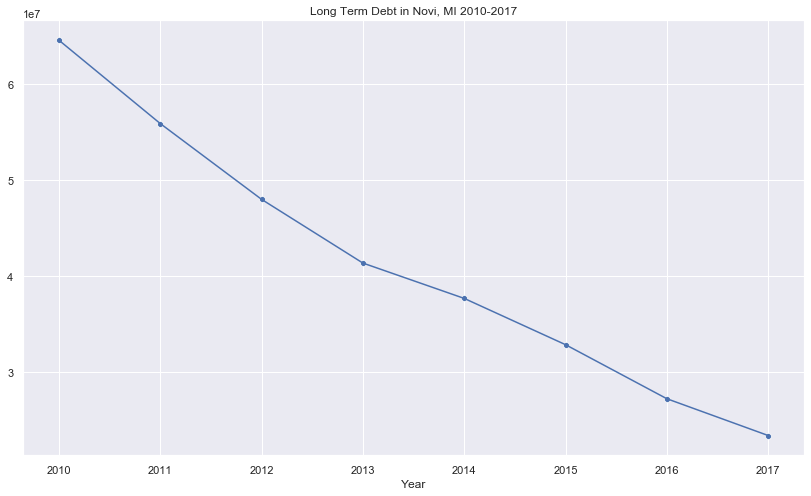

In [23]:
fig7, ax7 = plt.subplots(figsize=(14,8))
sns.scatterplot(x='Year',y='Long Term Debt',data=df_long)
sns.lineplot(x='Year',y='Long Term Debt',data=df_long)

ax7.set_xlabel('Year')
ax7.set_ylabel('')
ax7.set_title('Long Term Debt in Novi, MI 2010-2017')

#### Correlation  between Long Term Debt and Population

Text(0.5, 1.0, 'Long Term Debt vs. Population in Novi, MI 2010-2017')

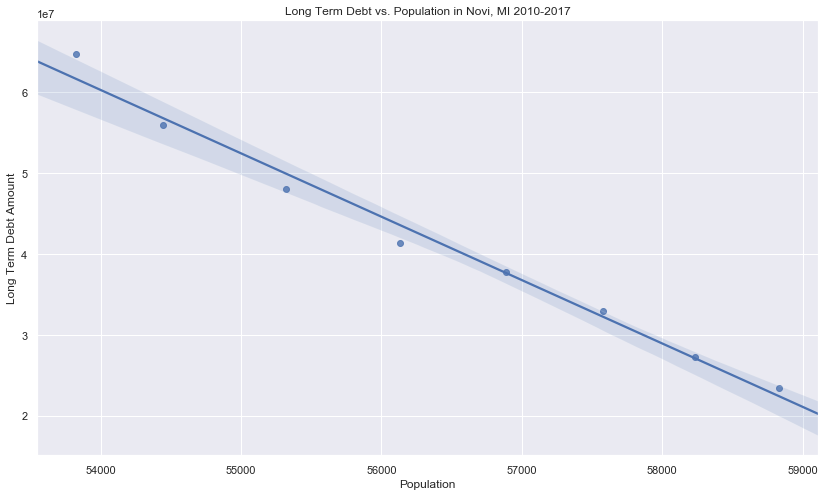

In [24]:
fig8, ax8 = plt.subplots(figsize=(14,8))

sns.regplot(x='Population', y='Long Term Debt', data=df_long)

ax8.set_xlabel('Population')
ax8.set_ylabel('Long Term Debt Amount')
ax8.set_title('Long Term Debt vs. Population in Novi, MI 2010-2017')

### Debt Service

#### To get html debt service data: https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&format=google&variable=finance.michigan_debt.debt_service&entity_id=1600000US2659440

In [25]:
debt_s_html = requests.get('https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&format=google&variable=finance.michigan_debt.debt_service&entity_id=1600000US2659440').text
soup_debt_s = BeautifulSoup(debt_s_html,'lxml')

str_debt_s = soup_debt_s.p.text

In [26]:
year, pct = json2list(str_debt_s)
pct = [x * 100 for x in pct]

df_debt_s = pd.DataFrame(year,columns=['Year'])
df_debt_s['Debt Service %'] = pct

df_debt_s

,Year,Debt Service %
0,2010,12.0
1,2011,12.0
2,2012,11.0
3,2013,8.0
4,2014,5.0
5,2015,5.0
6,2016,13.0
7,2017,3.0


Text(0.5, 1.0, 'Debt Service % in Novi, MI 2010-2017')

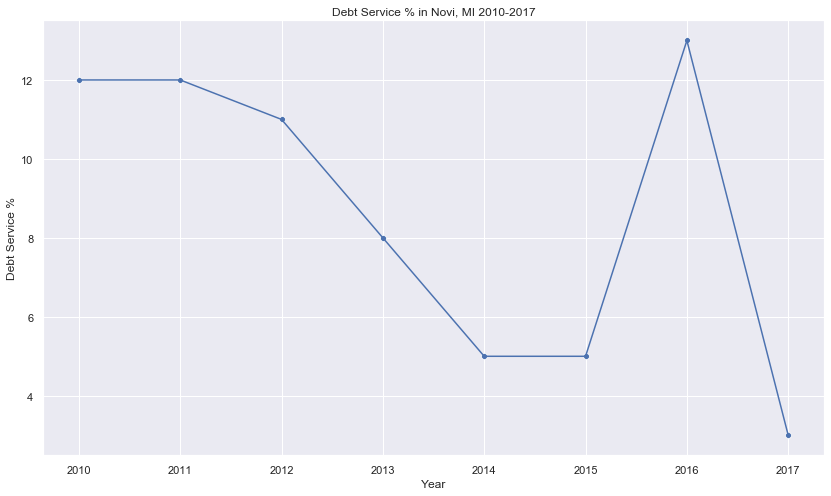

In [27]:
fig9, ax9 = plt.subplots(figsize=(14,8))
sns.scatterplot(x='Year',y='Debt Service %',data=df_debt_s)
sns.lineplot(x='Year',y='Debt Service %',data=df_debt_s)

ax9.set_xlabel('Year')
ax9.set_ylabel('Debt Service %')
ax9.set_title('Debt Service % in Novi, MI 2010-2017')

### Debt as % of Taxable Value

#### To get html debt percentage data: https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&format=google&variable=finance.michigan_debt.debt_taxable_value&entity_id=1600000US2659440

In [28]:
debt_p_html = requests.get('https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&format=google&variable=finance.michigan_debt.debt_taxable_value&entity_id=1600000US2659440').text
soup_debt_p = BeautifulSoup(debt_p_html,'lxml')

str_debt_p = soup_debt_p.p.text

year, pct = json2list(str_debt_p)
pct = [x * 100 for x in pct]

df_debt_p = pd.DataFrame(year,columns=['Year'])
df_debt_p['Debt %'] = pct

df_debt_p

,Year,Debt %
0,2010,2.000000
1,2011,1.000000
2,2012,1.000000
3,2013,1.000000
4,2014,1.000000
5,2015,1.000000
6,2016,0.825766
7,2017,0.678238


Text(0.5, 1.0, 'Debt as % of Taxable Value in Novi, MI 2010-2017')

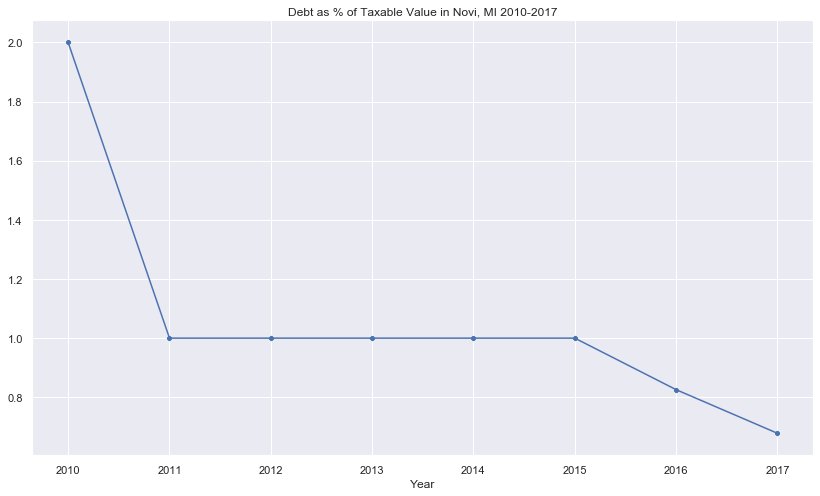

In [29]:
fig10, ax10 = plt.subplots(figsize=(14,8))
sns.scatterplot(x='Year',y='Debt %',data=df_debt_p)
sns.lineplot(x='Year',y='Debt %',data=df_debt_p)

ax10.set_xlabel('Year')
ax10.set_ylabel('')
ax10.set_title('Debt as % of Taxable Value in Novi, MI 2010-2017')

### Long Term Debt Revenue

#### To get html long term debt revenue data: https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&format=google&variable=finance.michigan_debt.long_term_debt_revenue&entity_id=1600000US2659440

In [30]:
debt_r_html = requests.get('https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&format=google&variable=finance.michigan_debt.long_term_debt_revenue&entity_id=1600000US2659440').text
soup_debt_r = BeautifulSoup(debt_r_html,'lxml')

str_debt_r = soup_debt_r.p.text

year, pct = json2list(str_debt_r)
pct = [x * 100 for x in pct]

df_debt_r = pd.DataFrame(year,columns=['Year'])
df_debt_r['Debt %'] = pct

df_debt_r

,Year,Debt %
0,2010,76.0
1,2011,66.0
2,2012,60.0
3,2013,49.0
4,2014,40.0
5,2015,32.0
6,2016,23.0
7,2017,24.0


Text(0.5, 1.0, 'Long Term Debt Revenue in Novi, MI 2010-2017')

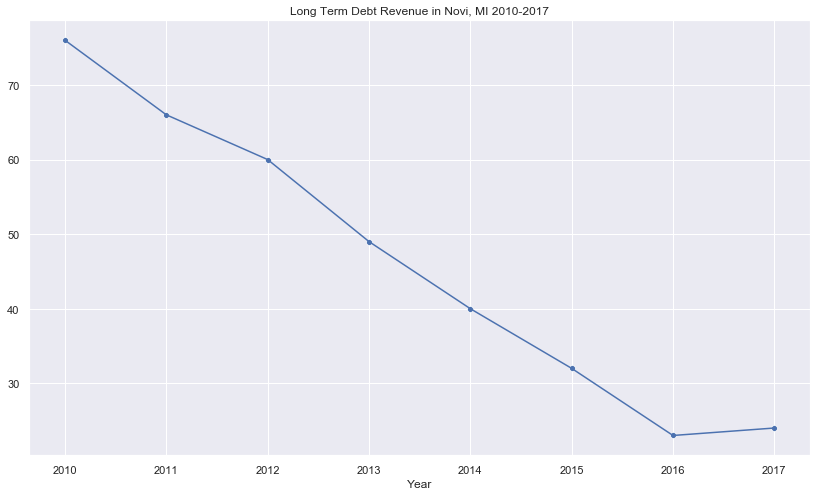

In [31]:
fig11, ax11 = plt.subplots(figsize=(14,8))
sns.scatterplot(x='Year',y='Debt %',data=df_debt_r)
sns.lineplot(x='Year',y='Debt %',data=df_debt_r)

ax11.set_xlabel('Year')
ax11.set_ylabel('')
ax11.set_title('Long Term Debt Revenue in Novi, MI 2010-2017')